In [3]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns

In [4]:
import pandas as pd

df = pd.read_csv('android_traffic.csv')
df.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [5]:
print("Spalten:", df.columns)
print("")
print("Shape:", df.shape)

Spalten: Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate',
       'source_app_packets.1', 'dns_query_times', 'type'],
      dtype='object')

Shape: (7845, 17)


NameError: name 'ax' is not defined

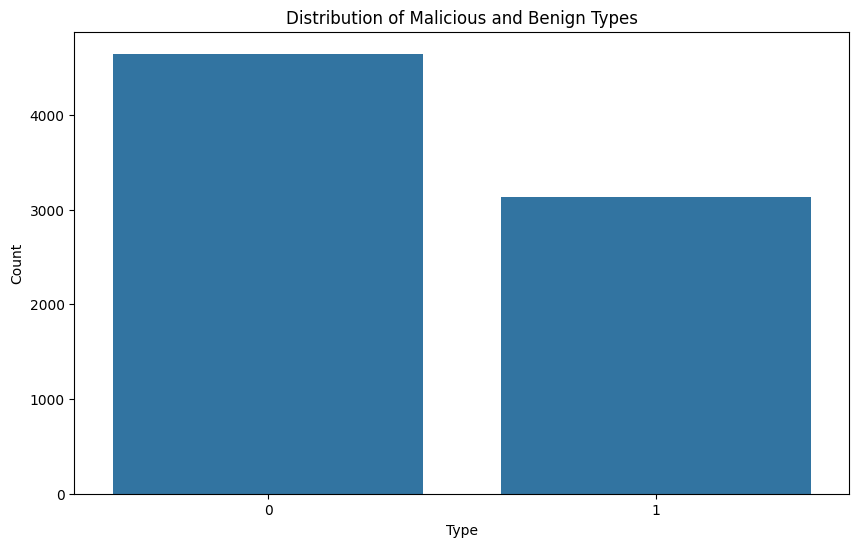

In [20]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of 'type'
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Malicious and Benign Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

print(data['type'].value_counts())

In [7]:
print(df.type.value_counts())
print("")
print(df.isnull().sum())

type
benign       4704
malicious    3141
Name: count, dtype: int64

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64


In [8]:
# Check if source_app_packets.1 and source_app_packets have the same rows and values
identical = df['source_app_packets.1'].equals(df['source_app_packets'])

if identical:
    print("source_app_packets.1 and source_app_packets are 1:1 identical.")
else:
    print("source_app_packets.1 and source_app_packets are not 1:1 identical.")


source_app_packets.1 and source_app_packets are 1:1 identical.


In [9]:
df = df.drop(['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate', 'source_app_packets.1'], axis=1).copy()
df.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,913.000000


In [10]:
df.shape

(7845, 13)

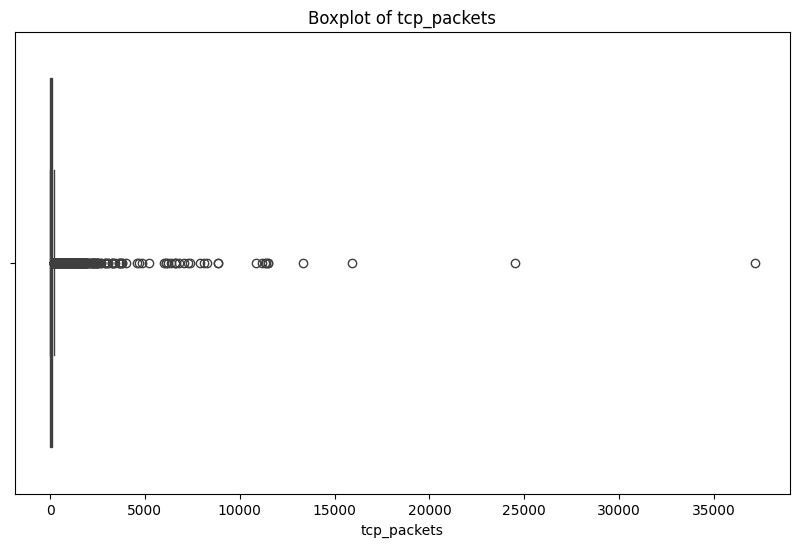

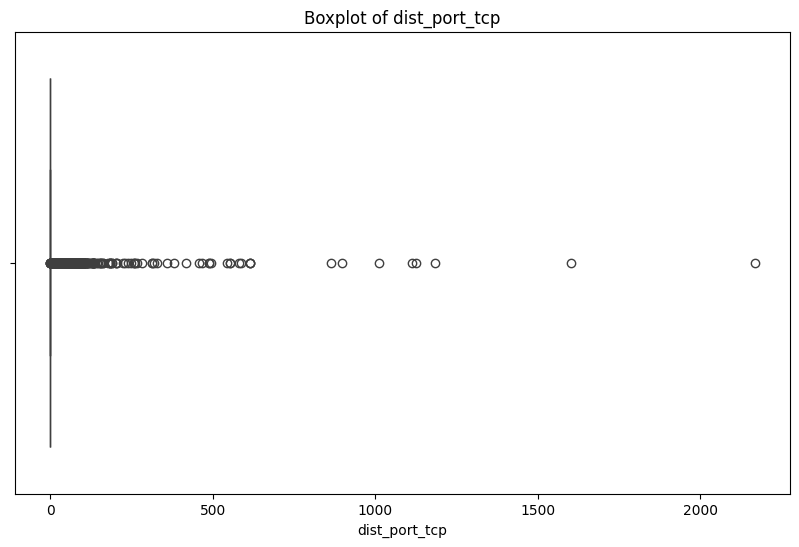

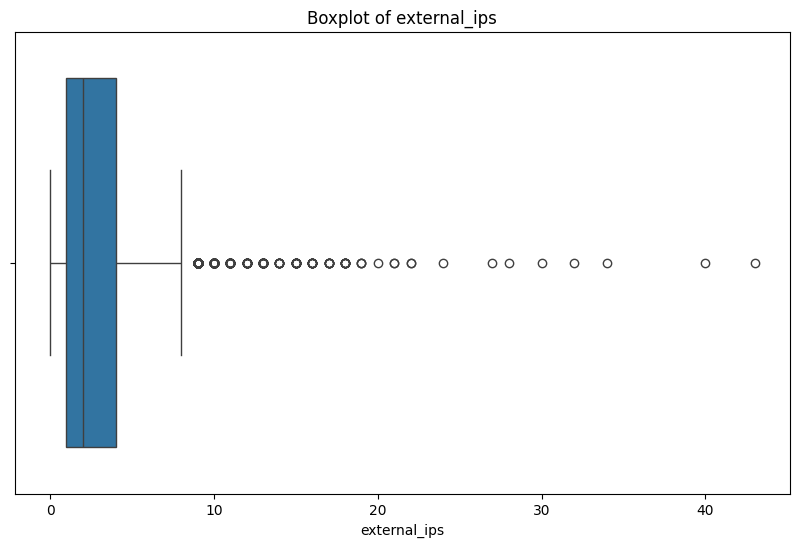

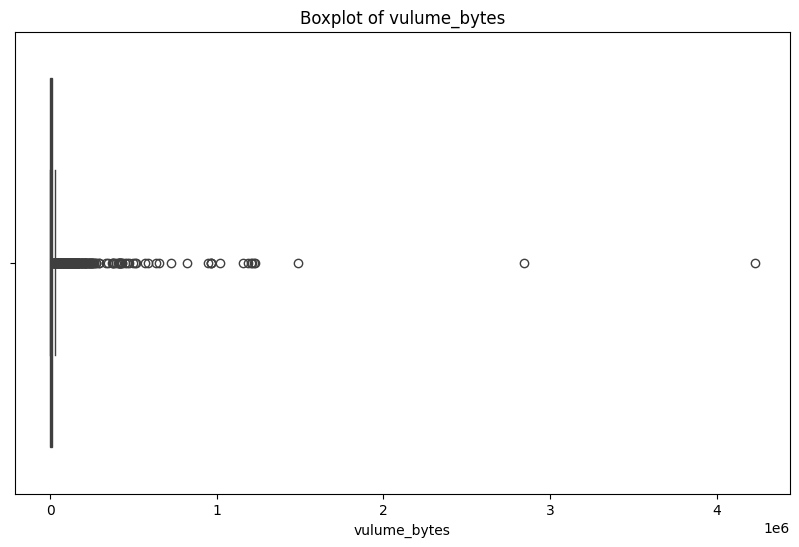

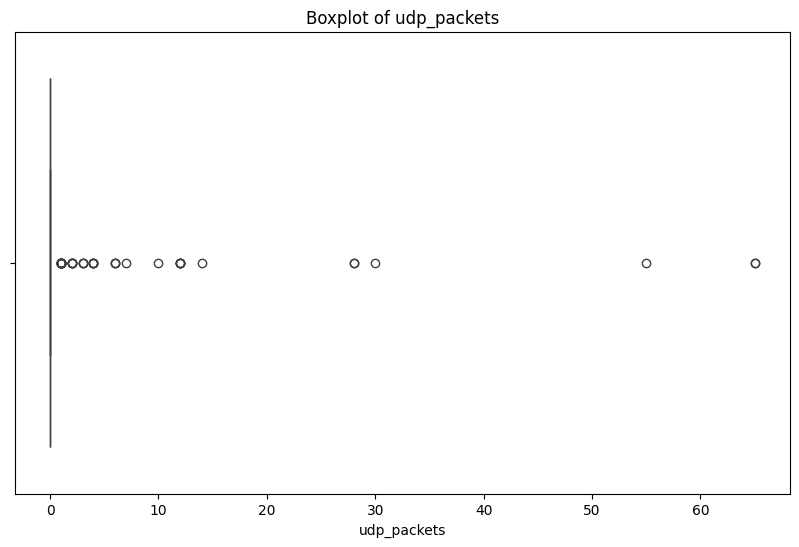

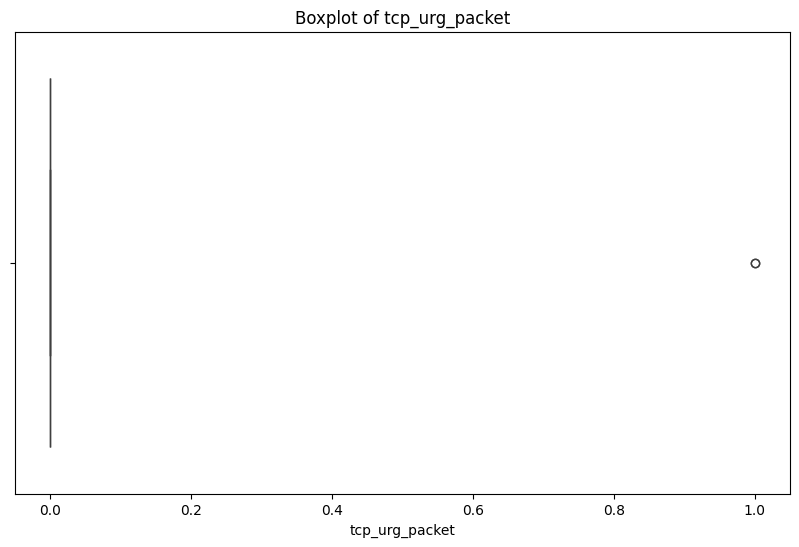

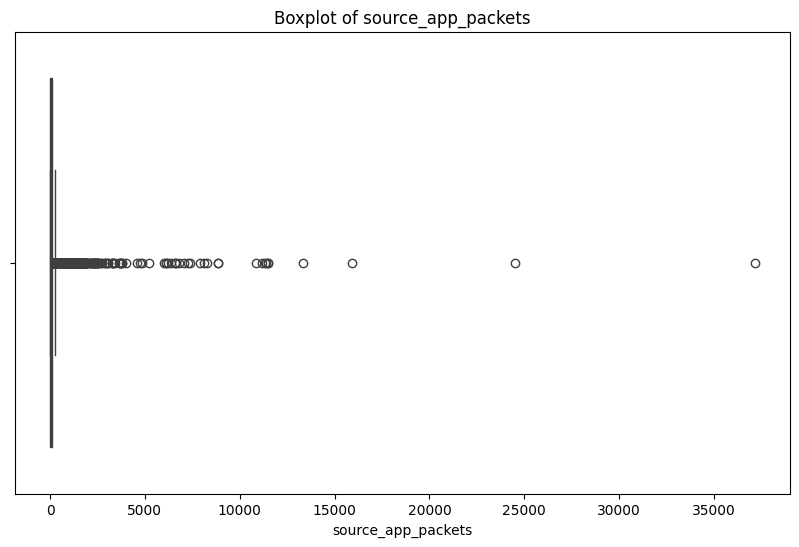

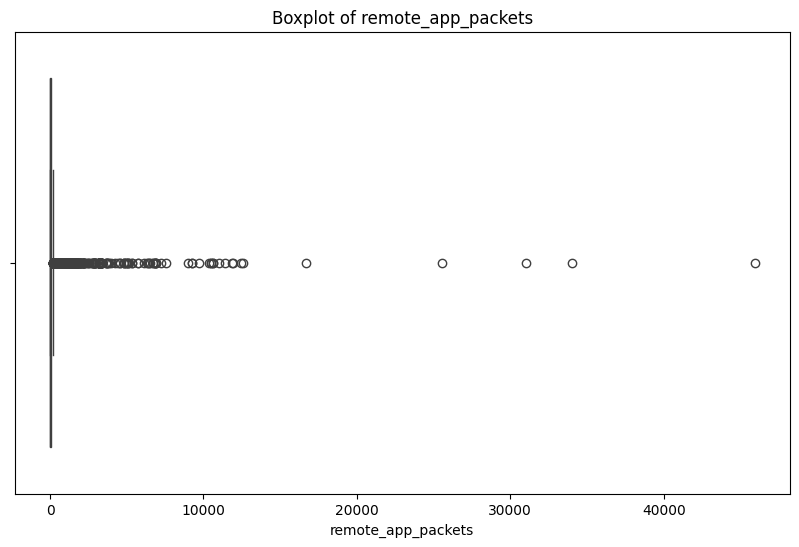

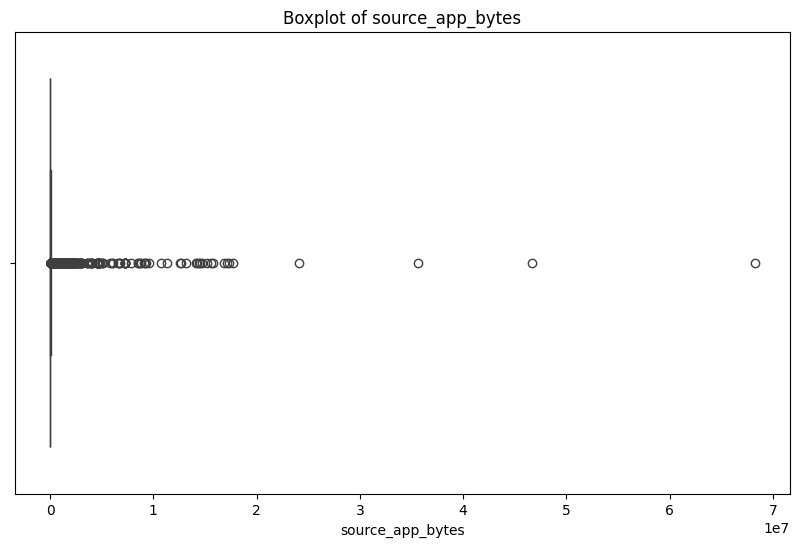

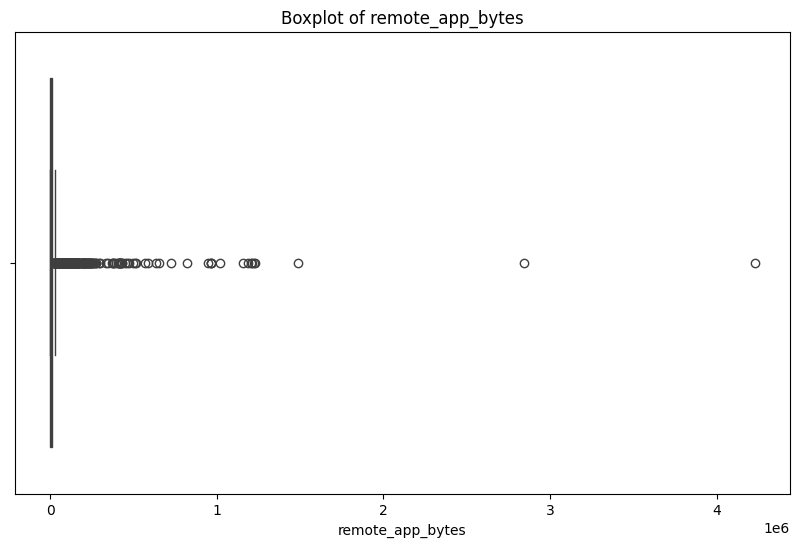

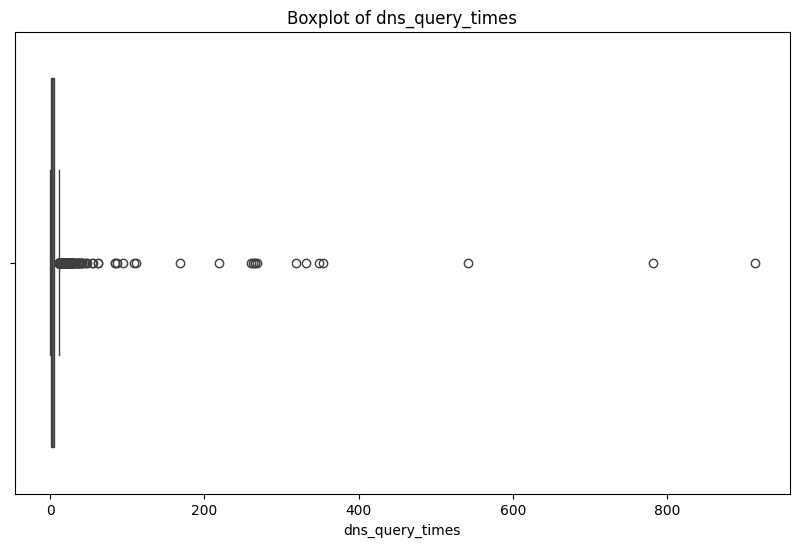

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column and create a boxplot
for column in df.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [12]:
df = df[df.tcp_packets<20000].copy()
df = df[df.dist_port_tcp<1500].copy()
df = df[df.external_ips<35].copy()
df = df[df.vulume_bytes<2000000].copy()
df = df[df.udp_packets<20].copy()
df = df[df.tcp_urg_packet<0.5].copy()
df = df[df.source_app_packets<20000].copy()
df = df[df.remote_app_packets<40000].copy()
df = df[df.source_app_bytes<5000000].copy()
df = df[df.remote_app_bytes<20000000].copy()
df = df[df.dns_query_times<600].copy()

pairplot.png already exists, skipping recalculation.


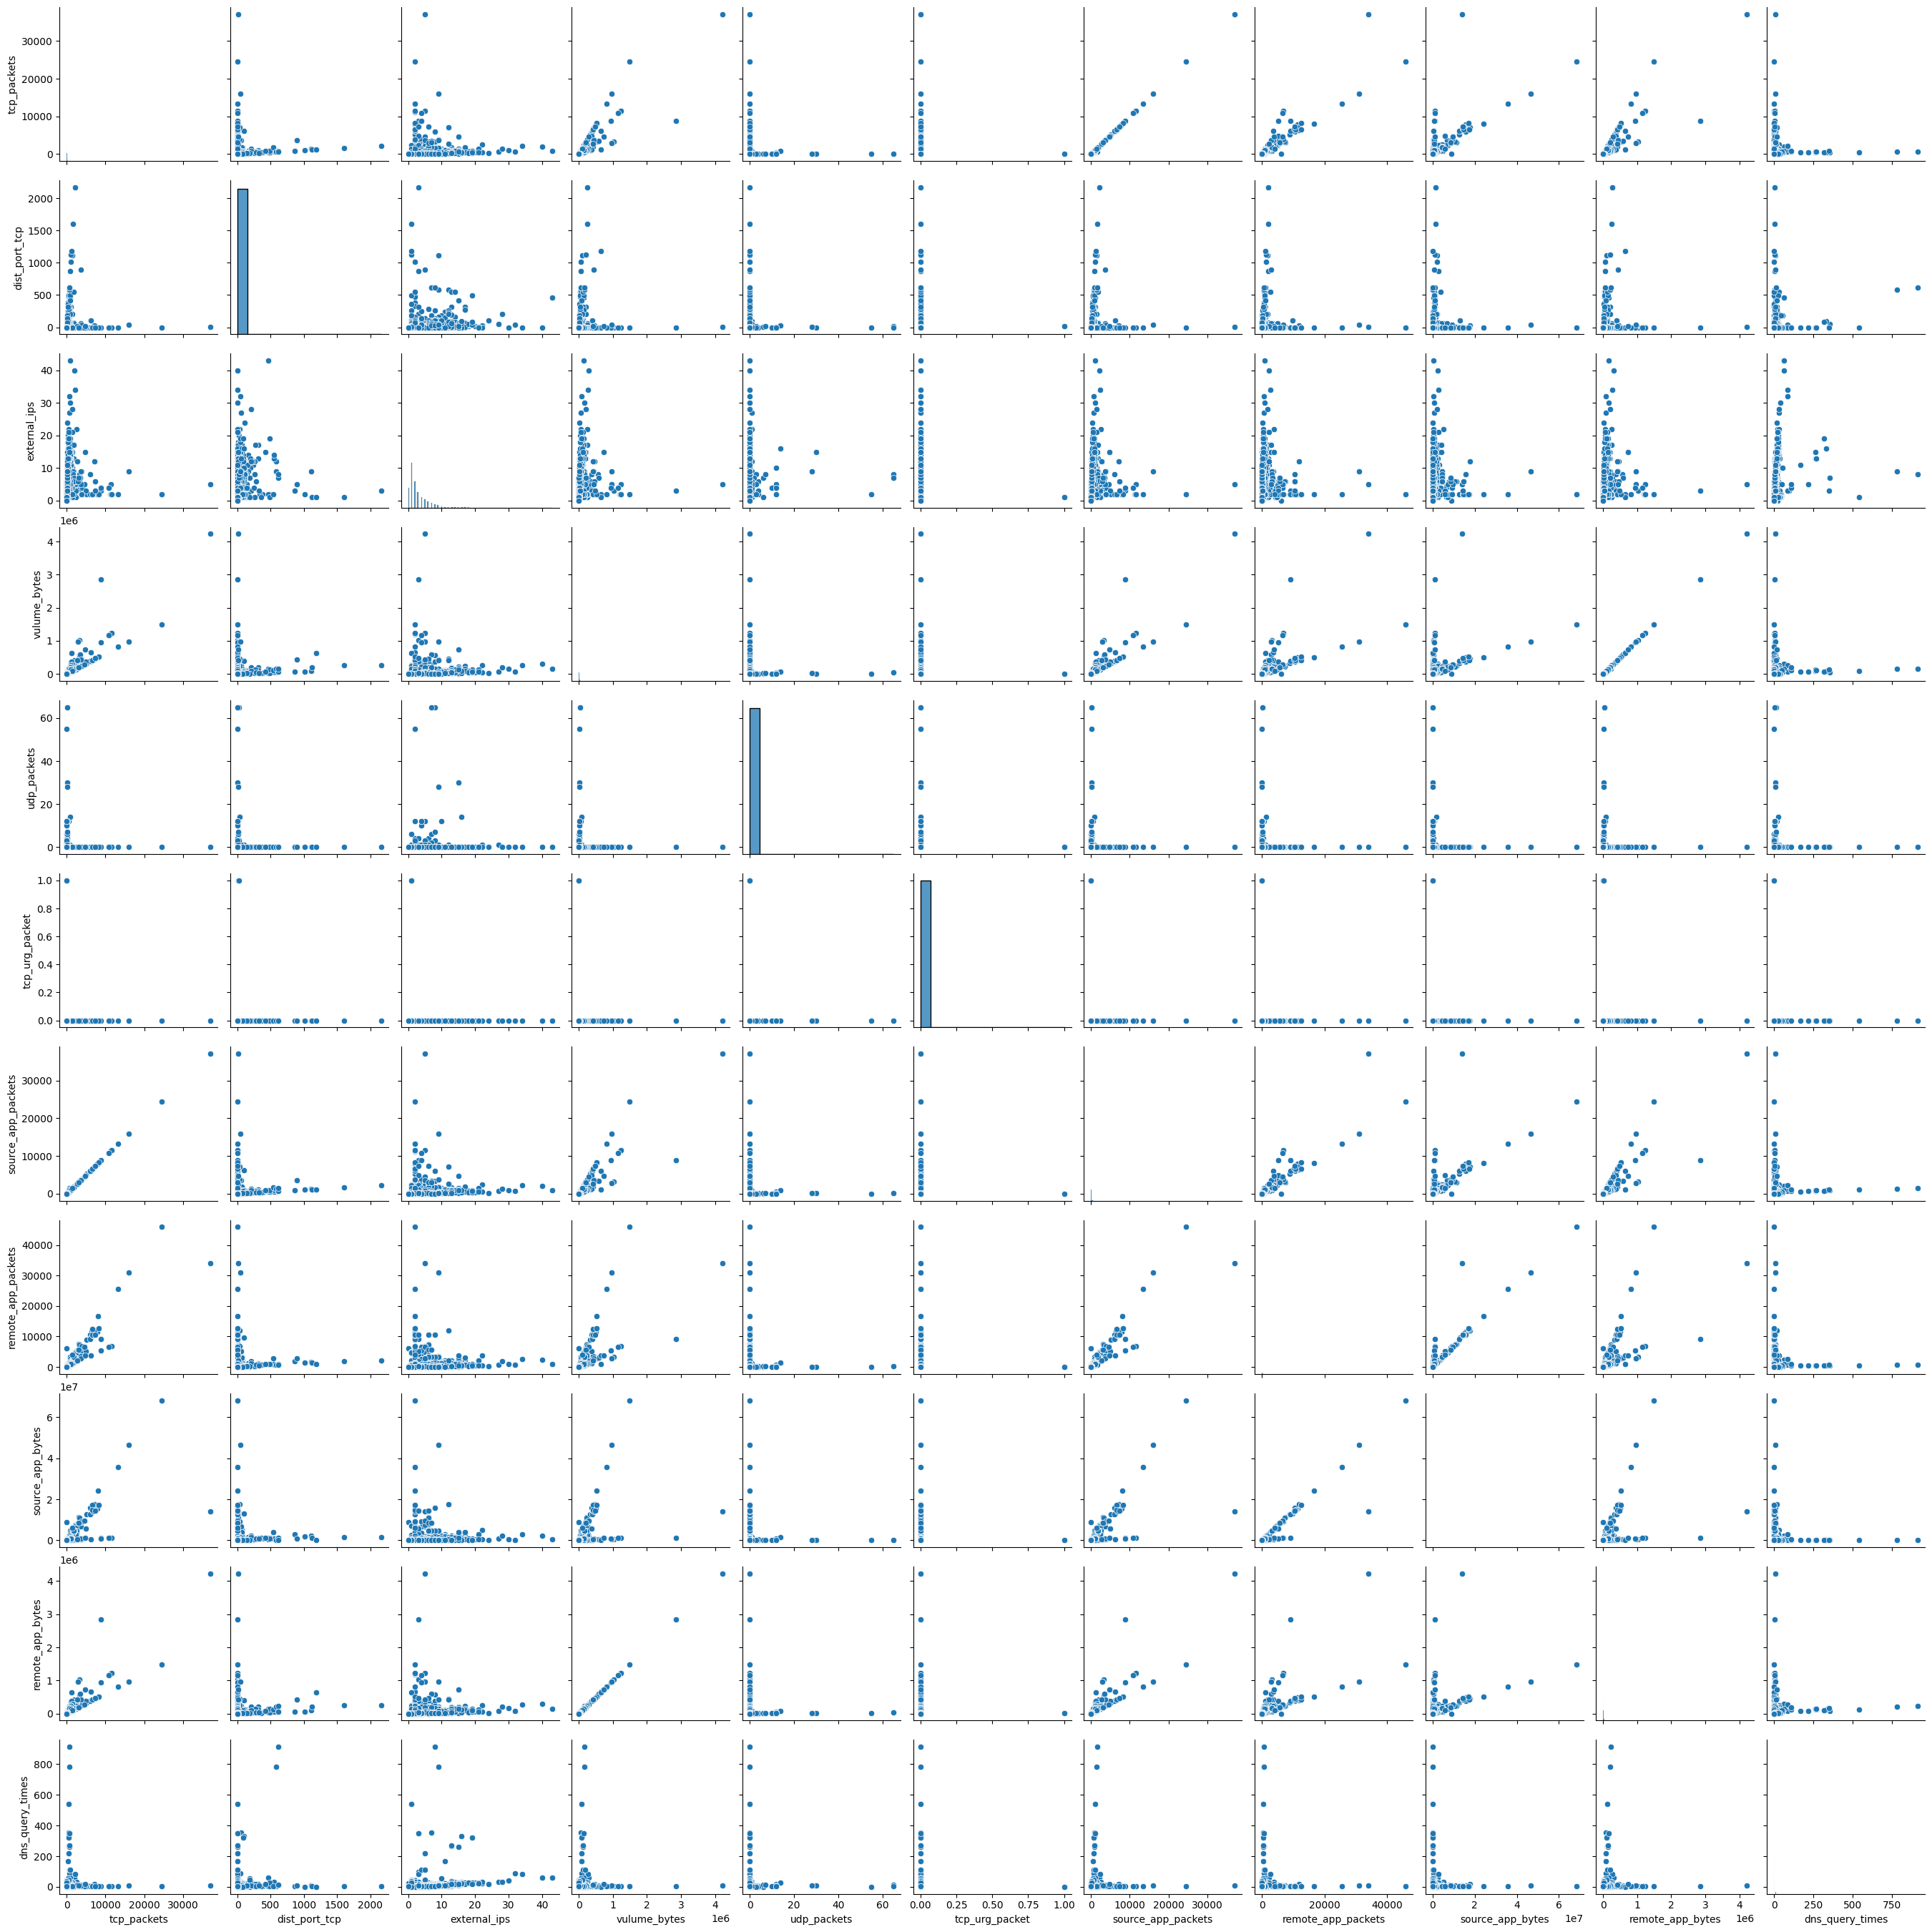

In [13]:
import os
from IPython.display import Image, display

# Check if the pairplot.png file exists
if not os.path.exists("pairplot.png"):
    # Cache the pairplot to avoid recalculating it every time
    pairplot = sns.pairplot(df)
    pairplot.savefig("pairplot.png")
else:
    print("pairplot.png already exists, skipping recalculation.")

# Display the image
display(Image(filename="pairplot.png"))

In [14]:
#NOTES
#AUSSREISSER: tcp_packets, dist_port_tcp, external_ips, vulume_bytes, udp_packets, remote_app_packets


In [15]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(df.iloc[:,1:11])
scaledData = pd.DataFrame(scaledData, columns=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times'])

print(scaledData.head())

   tcp_packets  dist_port_tcp  external_ips  vulume_bytes  udp_packets  \
0     0.130952            6.0      0.333333      0.041832          0.0   
1     1.095238            0.0      2.333333      1.838171          0.0   
2     2.035714            0.0      1.333333      1.896543          0.0   
3    -0.226190            0.0     -0.333333     -0.235092          0.0   
4    -0.226190            0.0     -0.333333     -0.235733          0.0   

   source_app_packets  remote_app_packets   source_app_bytes  \
0                 0.0            0.102273           0.108434   
1                 0.0            1.113636           1.000000   
2                 0.0            1.988636           2.289157   
3                 0.0           -0.261364          -0.216867   
4                 0.0           -0.261364          -0.216867   

   remote_app_bytes  dns_query_times  
0          0.048429         0.035491  
1          0.953175         1.842929  
2          6.841601         1.888432  
3         -0.1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,0:10], df.type.astype("str"), test_size=0.2, random_state=45)

In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150, 200, 250],
    'max_depth': [10, 20, 25, 50],
    'random_state': [15, 30, 45, 60]
}

# Define StratifiedKFold for consistent splitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=cv,  # Use StratifiedKFold for cross-validation
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 20, 'n_estimators': 100, 'random_state': 15}
Best accuracy score:  0.8944914811734901


In [18]:
# Train the model with the best parameters
best_params = grid_search.best_params_
rdF = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=15
)

rdF.fit(X_train, y_train)
pred = rdF.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, pred)
print(rdF)
print("Test accuracy: ", accuracy)
print(classification_report(y_test, pred))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

RandomForestClassifier(max_depth=20, random_state=15)
Test accuracy:  0.9120102761721259
              precision    recall  f1-score   support

      benign       0.92      0.94      0.93       938
   malicious       0.90      0.87      0.89       619

    accuracy                           0.91      1557
   macro avg       0.91      0.90      0.91      1557
weighted avg       0.91      0.91      0.91      1557

Cohen Kappa Score:  0.8151419481812658
Confusion Matrix: 
 [[881  57]
 [ 80 539]]


In [19]:
## Noch luege wiemer da implementieret oder obs überhaupt sinn macht de GradientBoost benutze tbh


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Encode the 'type' column to numerical values
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Drop irrelevant columns
#df = df.drop('name', axis=1).copy()

# Check for missing values and fill them
if df.isnull().sum().any():
    df.fillna(0, inplace=True)

# Daten laden und vorbereiten
X = df.drop('type', axis=1)  # Features
y = df['type']              # Zielvariable

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Modell erstellen
gb_model = GradientBoostingClassifier(
    n_estimators=100,       # Anzahl Bäume
    learning_rate=0.1,      # Schrittweite
    max_depth=6,            # Maximale Baumtiefe
    random_state=42         # Reproduzierbarkeit
)

# Modell trainieren
gb_model.fit(X_train, y_train)

# Vorhersagen
y_pred = gb_model.predict(X_test)

# Ergebnisse
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Calculate Cohen Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Cohen Kappa Score:", kappa_score)

ValueError: could not convert string to float: 'Finance'